## Capstone: Project Draft

#### Class ALY6140.80784: Analytics Systems Technology 
#### Prof. Daya Rudhramoorthi
 
#### Group 5 members:  
#### Min-Chi Tsai
#### Fatima Nurmakhamadova
 
 
#### May 15, 2022 

###  Import Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

## Data Extraction
### Importing the dataset

In [2]:
# Import the dataset
# Min-Chi use google colab, need to setup file path first, can be moved in the final doc
#from google.colab import drive
#drive.mount('/content/drive')

#path = '/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Traffic_Crashes_-_Crashes.csv'
#df = pd.read_csv(path, parse_dates=['CRASH_DATE'], index_col=['CRASH_DATE'])
#df.head()

In [3]:
# Importing data using the data location ------ IT TAKES SOME TIME TO BE LOADED
###THE ORIGINAL DATASET IS UPDATING EVERY SECONd, SO THE FINAL # of RECORDS 
### and REDULTS MIGHT BE SLIGHTLY DIFFERENT THAN IN THE REPORT
#data_url = 'https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD.'
#df = pd.read_csv(data_url, sep=',', parse_dates=['CRASH_DATE'], index_col=['CRASH_DATE'])
#df.head()

In [4]:
#IF THE METHOD ABOVE WON"T WORK, Please upload the attached 'Traffic_Crashes_-_Crashes.csv' file
#into the same folder where this file is in Jupyter Notebook
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv', parse_dates=['CRASH_DATE'], index_col=['CRASH_DATE'])
df.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,
2022-03-03 08:10:00,003679495357f71ca1bf3627ad7272ca5630d84540bcae...,JF161652,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,8,5,3,41.998309,-87.659696,POINT (-87.659696383256 41.99830880639)
2022-03-23 12:32:00,0023ceba30bfb72ebe36aee9ab60cfee33dc229b937d8a...,JF183784,NaN,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,1.0,0.0,1.0,0.0,12,4,3,41.801325,-87.675868,POINT (-87.675868375877 41.801324614001)
2022-02-16 11:30:00,0056da66abbbe3801471a3b091e81b7a7a647d8b5370ca...,JF146223,NaN,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,...,0.0,0.0,2.0,0.0,11,4,2,41.909765,-87.743376,POINT (-87.743376295706 41.909764527033)
2022-03-03 14:44:00,0170e0133213239b2753a9578526769f0a63fa74431ac4...,JF162167,NaN,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,...,0.0,1.0,4.0,0.0,14,5,3,41.708174,-87.566990,POINT (-87.566990336926 41.708174419983)
2022-03-17 19:48:00,03a7e6d3855a70cdab7ca3cc911e1bfdd501c0b12f9f14...,JF177620,NaN,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,19,5,3,41.757628,-87.645580,POINT (-87.645579700595 41.757628390408)


In [5]:
df.shape

(605120, 48)

In [6]:
df.nunique()

CRASH_RECORD_ID                  605120
RD_NO                            601467
CRASH_DATE_EST_I                      2
POSTED_SPEED_LIMIT                   43
TRAFFIC_CONTROL_DEVICE               19
DEVICE_CONDITION                      8
WEATHER_CONDITION                    12
LIGHTING_CONDITION                    6
FIRST_CRASH_TYPE                     18
TRAFFICWAY_TYPE                      20
LANE_CNT                             41
ALIGNMENT                             6
ROADWAY_SURFACE_COND                  7
ROAD_DEFECT                           7
REPORT_TYPE                           3
CRASH_TYPE                            2
INTERSECTION_RELATED_I                2
NOT_RIGHT_OF_WAY_I                    2
HIT_AND_RUN_I                         2
DAMAGE                                3
DATE_POLICE_NOTIFIED             462507
PRIM_CONTRIBUTORY_CAUSE              40
SEC_CONTRIBUTORY_CAUSE               40
STREET_NO                         11368
STREET_DIRECTION                      4


In [7]:
#Extract data for the year 2022
crash22 = df.loc['2022-01-01':'2022-04-30']
crash22 = crash22.reset_index(level=0)

#Choose only needed columns
crash22 = crash22[['CRASH_DATE', 'POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE', 
                  'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                  'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ROADWAY_SURFACE_COND', 
                  'ROAD_DEFECT','REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I', 
                  'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 
                  'SEC_CONTRIBUTORY_CAUSE','WORK_ZONE_TYPE','NUM_UNITS','MOST_SEVERE_INJURY', 
                  'INJURIES_TOTAL','CRASH_HOUR','CRASH_DAY_OF_WEEK', 'CRASH_MONTH']]

In [8]:
#Recheck the dataset
crash22.shape

(29605, 26)

## Data Cleaning
### Checking for wrong data types

In [9]:
#Show the variables type
crash22.dtypes

CRASH_DATE                 datetime64[ns]
POSTED_SPEED_LIMIT                  int64
TRAFFIC_CONTROL_DEVICE             object
DEVICE_CONDITION                   object
WEATHER_CONDITION                  object
LIGHTING_CONDITION                 object
FIRST_CRASH_TYPE                   object
TRAFFICWAY_TYPE                    object
LANE_CNT                          float64
ROADWAY_SURFACE_COND               object
ROAD_DEFECT                        object
REPORT_TYPE                        object
CRASH_TYPE                         object
INTERSECTION_RELATED_I             object
NOT_RIGHT_OF_WAY_I                 object
HIT_AND_RUN_I                      object
DAMAGE                             object
PRIM_CONTRIBUTORY_CAUSE            object
SEC_CONTRIBUTORY_CAUSE             object
WORK_ZONE_TYPE                     object
NUM_UNITS                           int64
MOST_SEVERE_INJURY                 object
INJURIES_TOTAL                    float64
CRASH_HOUR                        

In [10]:
#Show the unique values in each column
crash22.nunique()

CRASH_DATE                 20207
POSTED_SPEED_LIMIT            20
TRAFFIC_CONTROL_DEVICE        17
DEVICE_CONDITION               8
WEATHER_CONDITION             12
LIGHTING_CONDITION             6
FIRST_CRASH_TYPE              17
TRAFFICWAY_TYPE               20
LANE_CNT                       2
ROADWAY_SURFACE_COND           7
ROAD_DEFECT                    7
REPORT_TYPE                    2
CRASH_TYPE                     2
INTERSECTION_RELATED_I         2
NOT_RIGHT_OF_WAY_I             2
HIT_AND_RUN_I                  2
DAMAGE                         3
PRIM_CONTRIBUTORY_CAUSE       36
SEC_CONTRIBUTORY_CAUSE        38
WORK_ZONE_TYPE                 4
NUM_UNITS                      9
MOST_SEVERE_INJURY             5
INJURIES_TOTAL                 9
CRASH_HOUR                    24
CRASH_DAY_OF_WEEK              7
CRASH_MONTH                    4
dtype: int64

#### Function 1:

In [11]:
#Making a function that find and return all unique values 
#in all columns in the dataset

def unique_features(df):
    """
    Takes a dataframe, and shows the unique 
    features of each column. 
    
    Parameters
    ----------
    df
        The dataset to be analyzed.
        
    Returns
    -------
    Unique Values
        Analyzes a dataframe and returns all 
        unique values that each column has.
    """
    for col in df:
        print ('\nUnique Features in Column %s'%col)
        print (df[col].unique()) 

In [12]:
# Unique features of Variables
unique_features(crash22)


Unique Features in Column CRASH_DATE
['2022-03-03T08:10:00.000000000' '2022-03-23T12:32:00.000000000'
 '2022-02-16T11:30:00.000000000' ... '2022-03-02T13:45:00.000000000'
 '2022-02-19T21:40:00.000000000' '2022-03-02T15:09:00.000000000']

Unique Features in Column POSTED_SPEED_LIMIT
[30 15 35 25 45 10 20  0  5 40  3 50 55 62 29  7 60 70 39 24]

Unique Features in Column TRAFFIC_CONTROL_DEVICE
['TRAFFIC SIGNAL' 'NO CONTROLS' 'STOP SIGN/FLASHER' 'OTHER' 'UNKNOWN'
 'PEDESTRIAN CROSSING SIGN' 'OTHER WARNING SIGN' 'OTHER REG. SIGN' 'YIELD'
 'RAILROAD CROSSING GATE' 'POLICE/FLAGMAN' 'DELINEATORS'
 'FLASHING CONTROL SIGNAL' 'OTHER RAILROAD CROSSING' 'SCHOOL ZONE'
 'NO PASSING' 'RR CROSSING SIGN']

Unique Features in Column DEVICE_CONDITION
['FUNCTIONING PROPERLY' 'NO CONTROLS' 'OTHER' 'UNKNOWN'
 'FUNCTIONING IMPROPERLY' 'NOT FUNCTIONING' 'WORN REFLECTIVE MATERIAL'
 'MISSING']

Unique Features in Column WEATHER_CONDITION
['CLEAR' 'RAIN' 'CLOUDY/OVERCAST' 'FOG/SMOKE/HAZE' 'SNOW'
 'FREEZING RAIN

##### Converting Wrong types into correct ones

In [13]:
#Convert date from object to date 
#crash22['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%d-%m-%Y')
crash22['CRASH_DATE'] = pd.to_datetime(crash22['CRASH_DATE']).dt.date
crash22.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ROADWAY_SURFACE_COND,...,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,2022-03-03,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),NaN,DRY,...,"OVER $1,500",DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,UNABLE TO DETERMINE,NaN,2,NO INDICATION OF INJURY,0.0,8,5,3
1,2022-03-23,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,WET,...,"OVER $1,500",FAILING TO YIELD RIGHT-OF-WAY,FAILING TO YIELD RIGHT-OF-WAY,NaN,3,NONINCAPACITATING INJURY,1.0,12,4,3
2,2022-02-16,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,PARKING LOT,NaN,DRY,...,"OVER $1,500",IMPROPER BACKING,UNABLE TO DETERMINE,NaN,2,NO INDICATION OF INJURY,0.0,11,4,2
3,2022-03-03,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,DRY,...,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,NOT APPLICABLE,NaN,3,"REPORTED, NOT EVIDENT",1.0,14,5,3
4,2022-03-17,30,NO CONTROLS,NO CONTROLS,CLOUDY/OVERCAST,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,DRY,...,"OVER $1,500",DISTRACTION - FROM INSIDE VEHICLE,NOT APPLICABLE,NaN,2,NO INDICATION OF INJURY,0.0,19,5,3


In [14]:
#Check the INJURIES_TOTAL value if it has decimal values
crash22['INJURIES_TOTAL'].value_counts() 

0.0    25612
1.0     2945
2.0      684
3.0      204
4.0       53
5.0       28
6.0        9
8.0        2
7.0        2
Name: INJURIES_TOTAL, dtype: int64

In [15]:
#Convert float variable INJURIES_TOTAL into integer
crash22['INJURIES_TOTAL'] = crash22['INJURIES_TOTAL'].fillna(0).astype("int64")

#crash22.INJURIES_TOTAL = crash22.INJURIES_TOTAL.round()

#Recheck the INJURIES_TOTAL value if it has decimal values
crash22['INJURIES_TOTAL'].value_counts() 

0    25678
1     2945
2      684
3      204
4       53
5       28
6        9
8        2
7        2
Name: INJURIES_TOTAL, dtype: int64

### Feature Engineering:  reduce the cardinality of a feature

In [16]:
#Function to reduce cardinality quickly 

from collections import Counter
def cumulatively_categorise(column,threshold=0.85,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
      break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  #Return only the transformed column if return_categories=False
  else:
    return new_column


In [17]:
#Call the function with a default threshold of 85%
#for PRIM_CONTRIBUTORY_CAUSE with 36 unique values
transformed_column,new_category_list=cumulatively_categorise(crash22['PRIM_CONTRIBUTORY_CAUSE'],return_categories_list=True)

#Check the unique values 
transformed_column.value_counts() 

UNABLE TO DETERMINE                       12151
Other                                      3919
FAILING TO YIELD RIGHT-OF-WAY              3125
FOLLOWING TOO CLOSELY                      2388
NOT APPLICABLE                             1415
IMPROPER OVERTAKING/PASSING                1364
FAILING TO REDUCE SPEED TO AVOID CRASH     1232
IMPROPER BACKING                           1026
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE        1024
IMPROPER LANE USAGE                         990
WEATHER                                     971
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [18]:
#Insert new version of PRIM_CONTRIBUTORY_CAUSE to the dataset and check
crash22['PRIM_CONTRIBUTORY_CAUSE'] = transformed_column
crash22['PRIM_CONTRIBUTORY_CAUSE'].value_counts() 

UNABLE TO DETERMINE                       12151
Other                                      3919
FAILING TO YIELD RIGHT-OF-WAY              3125
FOLLOWING TOO CLOSELY                      2388
NOT APPLICABLE                             1415
IMPROPER OVERTAKING/PASSING                1364
FAILING TO REDUCE SPEED TO AVOID CRASH     1232
IMPROPER BACKING                           1026
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE        1024
IMPROPER LANE USAGE                         990
WEATHER                                     971
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [19]:
#Call the function with a default threshold of 85%
#for SEC_CONTRIBUTORY_CAUSE with 38 unique values
transformed_column2,new_category_list=cumulatively_categorise(crash22['SEC_CONTRIBUTORY_CAUSE'],return_categories_list=True)

#Check the unique values 
transformed_column2.value_counts() 

NOT APPLICABLE                            11797
UNABLE TO DETERMINE                       11200
Other                                      3783
FAILING TO REDUCE SPEED TO AVOID CRASH      967
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE         952
FAILING TO YIELD RIGHT-OF-WAY               906
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

In [20]:
#Insert new version of PRIM_CONTRIBUTORY_CAUSE to the dataset and check
crash22['SEC_CONTRIBUTORY_CAUSE'] = transformed_column2
crash22['SEC_CONTRIBUTORY_CAUSE'].value_counts() 

NOT APPLICABLE                            11797
UNABLE TO DETERMINE                       11200
Other                                      3783
FAILING TO REDUCE SPEED TO AVOID CRASH      967
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE         952
FAILING TO YIELD RIGHT-OF-WAY               906
Name: SEC_CONTRIBUTORY_CAUSE, dtype: int64

In [21]:
#Show the unique values in each column
crash22.nunique()

CRASH_DATE                 109
POSTED_SPEED_LIMIT          20
TRAFFIC_CONTROL_DEVICE      17
DEVICE_CONDITION             8
WEATHER_CONDITION           12
LIGHTING_CONDITION           6
FIRST_CRASH_TYPE            17
TRAFFICWAY_TYPE             20
LANE_CNT                     2
ROADWAY_SURFACE_COND         7
ROAD_DEFECT                  7
REPORT_TYPE                  2
CRASH_TYPE                   2
INTERSECTION_RELATED_I       2
NOT_RIGHT_OF_WAY_I           2
HIT_AND_RUN_I                2
DAMAGE                       3
PRIM_CONTRIBUTORY_CAUSE     11
SEC_CONTRIBUTORY_CAUSE       6
WORK_ZONE_TYPE               4
NUM_UNITS                    9
MOST_SEVERE_INJURY           5
INJURIES_TOTAL               9
CRASH_HOUR                  24
CRASH_DAY_OF_WEEK            7
CRASH_MONTH                  4
dtype: int64

In [22]:
#Convert object variables into categorical
categ_cols = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 
              'LIGHTING_CONDITION','FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 
              'ROADWAY_SURFACE_COND', 'ROAD_DEFECT','REPORT_TYPE', 'CRASH_TYPE', 
              'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I', 
              'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
              'WORK_ZONE_TYPE','MOST_SEVERE_INJURY']
crash22[categ_cols] = crash22[categ_cols].astype('category')

In [23]:
#reengineer the target variable CRASH_TYPE from category to integer 
crash22['CRASH_TYPE'] = crash22['CRASH_TYPE'].replace(['NO INJURY / DRIVE AWAY', 
                                                       'INJURY AND / OR TOW DUE TO CRASH'], [0, 1])

#Recheck the CRASH_TYPE value if it has decimal values
crash22['CRASH_TYPE'].value_counts() 

0    21017
1     8588
Name: CRASH_TYPE, dtype: int64

In [24]:
#Recheck the variables type
crash22.dtypes

CRASH_DATE                   object
POSTED_SPEED_LIMIT            int64
TRAFFIC_CONTROL_DEVICE     category
DEVICE_CONDITION           category
WEATHER_CONDITION          category
LIGHTING_CONDITION         category
FIRST_CRASH_TYPE           category
TRAFFICWAY_TYPE            category
LANE_CNT                    float64
ROADWAY_SURFACE_COND       category
ROAD_DEFECT                category
REPORT_TYPE                category
CRASH_TYPE                    int64
INTERSECTION_RELATED_I     category
NOT_RIGHT_OF_WAY_I         category
HIT_AND_RUN_I              category
DAMAGE                     category
PRIM_CONTRIBUTORY_CAUSE    category
SEC_CONTRIBUTORY_CAUSE     category
WORK_ZONE_TYPE             category
NUM_UNITS                     int64
MOST_SEVERE_INJURY         category
INJURIES_TOTAL                int64
CRASH_HOUR                    int64
CRASH_DAY_OF_WEEK             int64
CRASH_MONTH                   int64
dtype: object

### Checking for missing values

In [25]:
# Check percentage of missing values 
percent_missing = crash22.isnull(). sum() * 100 / len(crash22)
percent_missing


CRASH_DATE                  0.000000
POSTED_SPEED_LIMIT          0.000000
TRAFFIC_CONTROL_DEVICE      0.000000
DEVICE_CONDITION            0.000000
WEATHER_CONDITION           0.000000
LIGHTING_CONDITION          0.000000
FIRST_CRASH_TYPE            0.000000
TRAFFICWAY_TYPE             0.000000
LANE_CNT                   99.989867
ROADWAY_SURFACE_COND        0.000000
ROAD_DEFECT                 0.000000
REPORT_TYPE                 2.979226
CRASH_TYPE                  0.000000
INTERSECTION_RELATED_I     75.865563
NOT_RIGHT_OF_WAY_I         95.287958
HIT_AND_RUN_I              65.789563
DAMAGE                      0.000000
PRIM_CONTRIBUTORY_CAUSE     0.000000
SEC_CONTRIBUTORY_CAUSE      0.000000
WORK_ZONE_TYPE             99.804087
NUM_UNITS                   0.000000
MOST_SEVERE_INJURY          0.222935
INJURIES_TOTAL              0.000000
CRASH_HOUR                  0.000000
CRASH_DAY_OF_WEEK           0.000000
CRASH_MONTH                 0.000000
dtype: float64

In [26]:
#Drop columns with missing values more than 50%
crash22.drop(['LANE_CNT', 'INTERSECTION_RELATED_I',
             'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 
             'WORK_ZONE_TYPE'], axis=1, inplace=True)

In [27]:
#Drop rows with missing values less than 5%
crash22 = crash22.dropna()

In [28]:
#Recheck missing values 
crash22.isna().any()

CRASH_DATE                 False
POSTED_SPEED_LIMIT         False
TRAFFIC_CONTROL_DEVICE     False
DEVICE_CONDITION           False
WEATHER_CONDITION          False
LIGHTING_CONDITION         False
FIRST_CRASH_TYPE           False
TRAFFICWAY_TYPE            False
ROADWAY_SURFACE_COND       False
ROAD_DEFECT                False
REPORT_TYPE                False
CRASH_TYPE                 False
DAMAGE                     False
PRIM_CONTRIBUTORY_CAUSE    False
SEC_CONTRIBUTORY_CAUSE     False
NUM_UNITS                  False
MOST_SEVERE_INJURY         False
INJURIES_TOTAL             False
CRASH_HOUR                 False
CRASH_DAY_OF_WEEK          False
CRASH_MONTH                False
dtype: bool

In [29]:
#Checking for 'No Data' or 'Unknown'
nodata_col = crash22.columns[crash22.isin(['No Data', 'NO DATA', 'Unknown', 'UNKNOWN']).any()]
print(nodata_col)

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT'],
      dtype='object')


In [30]:
#Check if Unknown values are major part of the data
crash22['TRAFFIC_CONTROL_DEVICE'].value_counts()
crash22['DEVICE_CONDITION'].value_counts()
crash22['WEATHER_CONDITION'].value_counts()
crash22['LIGHTING_CONDITION'].value_counts()
crash22['TRAFFICWAY_TYPE'].value_counts()
crash22['ROADWAY_SURFACE_COND'].value_counts()
crash22['ROAD_DEFECT'].value_counts()

NO DEFECTS           21982
UNKNOWN               6106
RUT, HOLES             254
OTHER                  143
WORN SURFACE           122
SHOULDER DEFECT         37
DEBRIS ON ROADWAY       14
Name: ROAD_DEFECT, dtype: int64

## Checking for the outliers

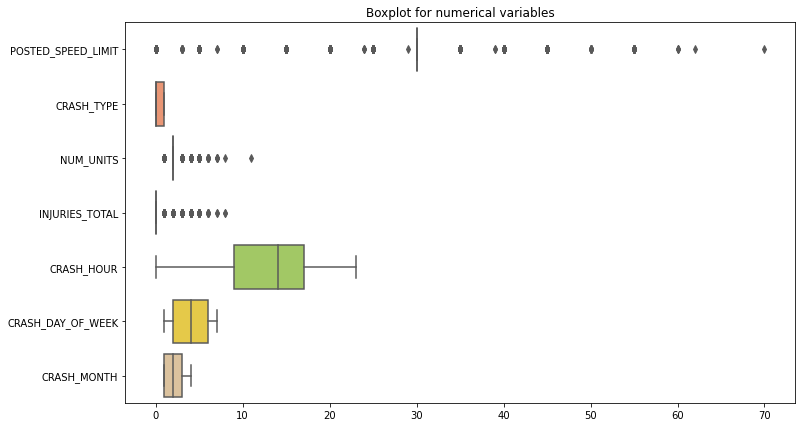

In [31]:
#Create boxplot for variables to check the outliers
plt.figure(figsize=(12, 7))
ax = sns.boxplot(data=crash22, orient="h", palette="Set2").set_title("Boxplot for numerical variables")

In [32]:
#IQR - outlier boundaries
Q1 = crash22.quantile(0.25)
Q3 = crash22.quantile(0.75)
IQR = Q3 - Q1

#Check lower and upper outliers
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR
print("The IQR score")
print("Lower limit : ")
print(lower_limit)
print("Upper limit : ")
print(upper_limit)

The IQR score
Lower limit : 
POSTED_SPEED_LIMIT    30.0
CRASH_TYPE            -1.5
NUM_UNITS              2.0
INJURIES_TOTAL         0.0
CRASH_HOUR            -3.0
CRASH_DAY_OF_WEEK     -4.0
CRASH_MONTH           -2.0
dtype: float64
Upper limit : 
POSTED_SPEED_LIMIT    30.0
CRASH_TYPE             2.5
NUM_UNITS              2.0
INJURIES_TOTAL         0.0
CRASH_HOUR            29.0
CRASH_DAY_OF_WEEK     12.0
CRASH_MONTH            6.0
dtype: float64


In [33]:
#Recheck outliers counts in POSTED_SPEED_LIMIT, NUM_UNITS, and INJURIES_TOTAL 
crash22['POSTED_SPEED_LIMIT'].value_counts()  #delete 29, 62 and 70
crash22['NUM_UNITS'].value_counts()  #delete 8 and 11
crash22['INJURIES_TOTAL'].value_counts() #no off-value outliers 

0    24938
1     2806
2      638
3      188
4       50
5       26
6        8
8        2
7        2
Name: INJURIES_TOTAL, dtype: int64

#### Function 2:

In [34]:
#Making a function that will remove rows that contain 
#spesific values in the column

def filter_dataset(df, col, values):
    """
    Takes a dataframe, column name,
    and values, then shows the dataset 
    without those values. 
    
    This function helps to filter and 
    show the dataset removing indicated
    specific values in specific column. 
    
    Parameters
    ----------
    df
        The dataset to be filtered.
    col
        The column to be filtered.
    values : int or str
        The value or values to be filtered. 
        
    Returns
    -------
    DataFrame
        Filtered dataframe without specified values.
    """
    return df[~df[col].isin(values)]

In [35]:
crash22 = filter_dataset(crash22, 'POSTED_SPEED_LIMIT', [29, 62, 70])
crash22 = filter_dataset(crash22, 'NUM_UNITS', [8, 11])

In [36]:
#Recheck outliers counts in POSTED_SPEED_LIMIT and NUM_UNITS
crash22['POSTED_SPEED_LIMIT'].value_counts()  #delete 29, 62 and 70
crash22['NUM_UNITS'].value_counts()  #delete 8 and 11

2    24697
1     1940
3     1619
4      298
5       84
6       10
7        5
Name: NUM_UNITS, dtype: int64

In [37]:
crash22.shape

(28653, 21)

In [38]:
crash22.dtypes

CRASH_DATE                   object
POSTED_SPEED_LIMIT            int64
TRAFFIC_CONTROL_DEVICE     category
DEVICE_CONDITION           category
WEATHER_CONDITION          category
LIGHTING_CONDITION         category
FIRST_CRASH_TYPE           category
TRAFFICWAY_TYPE            category
ROADWAY_SURFACE_COND       category
ROAD_DEFECT                category
REPORT_TYPE                category
CRASH_TYPE                    int64
DAMAGE                     category
PRIM_CONTRIBUTORY_CAUSE    category
SEC_CONTRIBUTORY_CAUSE     category
NUM_UNITS                     int64
MOST_SEVERE_INJURY         category
INJURIES_TOTAL                int64
CRASH_HOUR                    int64
CRASH_DAY_OF_WEEK             int64
CRASH_MONTH                   int64
dtype: object

## Data Visualization

In [39]:
# categorical varaibles
categorical = [var for var in crash22.columns if crash22[var].dtype.name=='category']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 13 categorical variables

The categorical variables are : ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'MOST_SEVERE_INJURY']


In [40]:
# numeric varaibles
numerical = crash22.select_dtypes(include = ['float64', 'int64']).columns.to_list()

display('There are {} numerical variables'.format(len(numerical)))
display(round(crash22[numerical].describe()),2)

'There are 7 numerical variables'

,POSTED_SPEED_LIMIT,CRASH_TYPE,NUM_UNITS,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
count,28653.0,28653.0,28653.0,28653.0,28653.0,28653.0,28653.0
mean,29.0,0.0,2.0,0.0,13.0,4.0,2.0
std,6.0,0.0,0.0,1.0,6.0,2.0,1.0
min,0.0,0.0,1.0,0.0,0.0,1.0,1.0
25%,30.0,0.0,2.0,0.0,9.0,2.0,1.0
50%,30.0,0.0,2.0,0.0,14.0,4.0,2.0
75%,30.0,1.0,2.0,0.0,17.0,6.0,3.0
max,60.0,1.0,7.0,8.0,23.0,7.0,4.0


2

In [41]:
crash22.columns

Index(['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'],
      dtype='object')

In [42]:
# create a generate histogram plot for categorical varaibles
def plot_cat (data,x):
  figsize = (10, 20)
  sns.set(style='darkgrid',font_scale=0.8)
  sns.countplot(data = data , y = x , hue= "CRASH_TYPE", alpha = 0.8)
  plt.title(x,fontsize=10)
  plt.ylabel("")
  return

<AxesSubplot:xlabel='count', ylabel='PRIM_CONTRIBUTORY_CAUSE'>

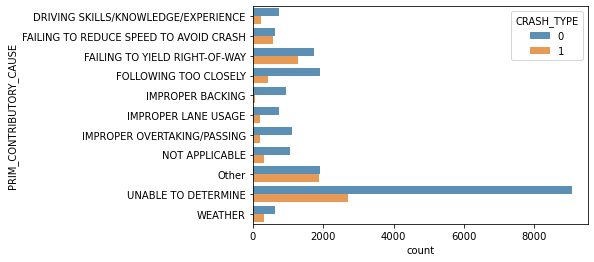

In [43]:
 figsize = (10, 30)
 sns.countplot(data = crash22 , y = "PRIM_CONTRIBUTORY_CAUSE" , hue= "CRASH_TYPE", alpha = 0.8)

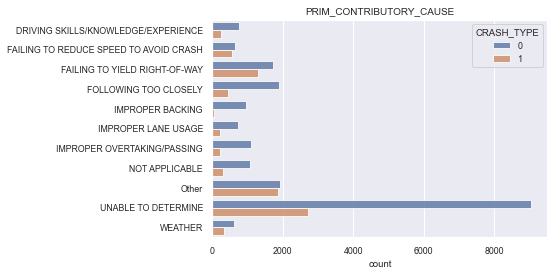

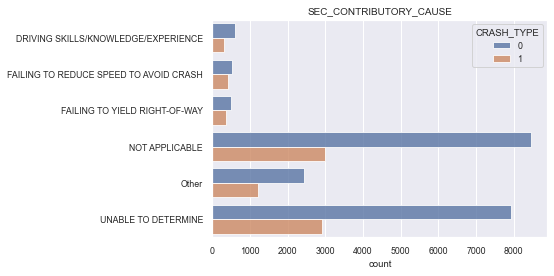

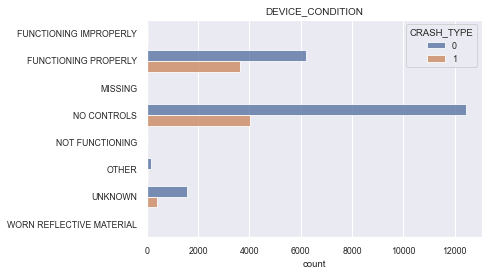

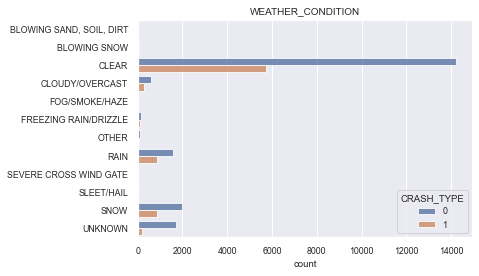

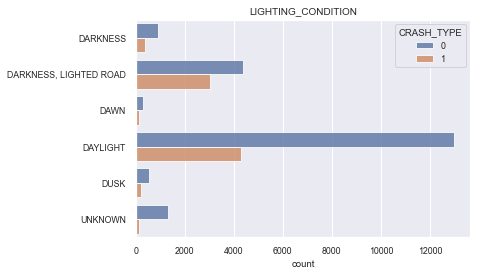

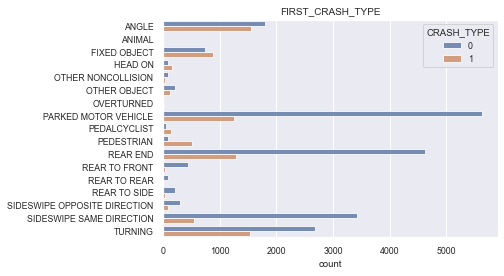

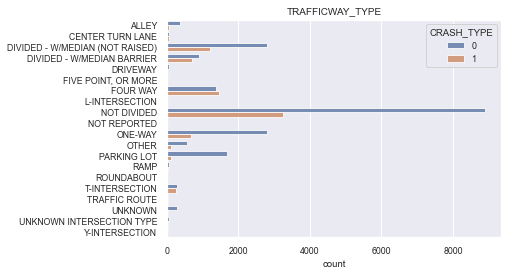

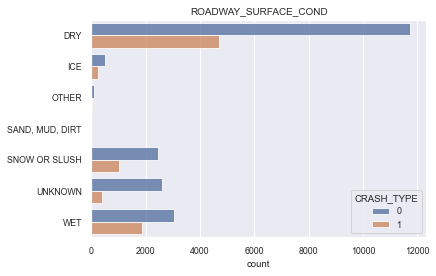

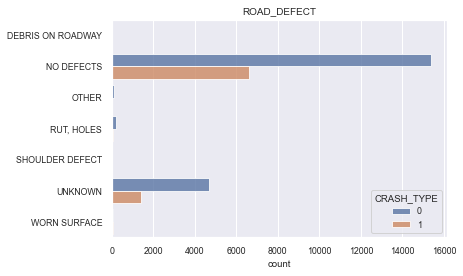

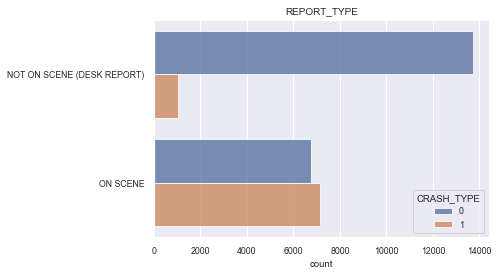

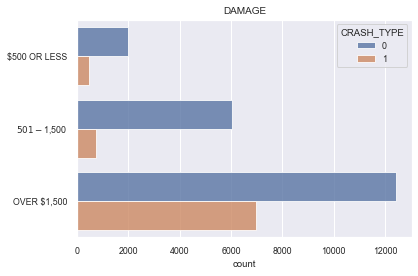

In [44]:
# plot categorical varaibles with low cardinality
low_cat = [ 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'DAMAGE']
for i in low_cat:
  plt.figure()
  plot_cat(crash22,i)
  plt.show()


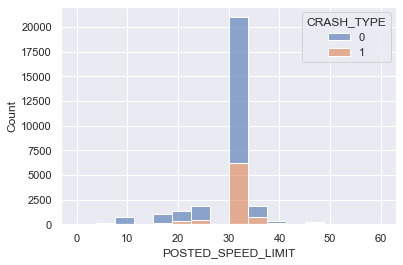

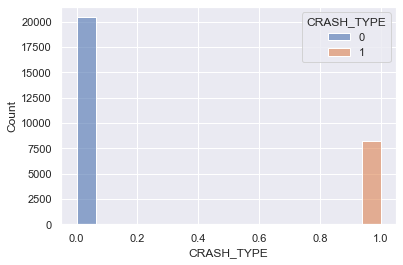

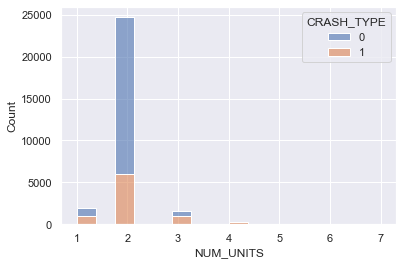

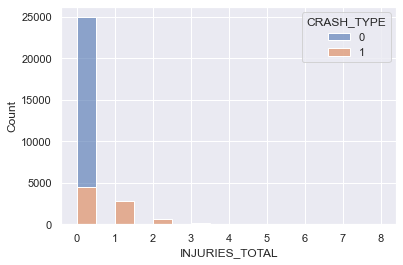

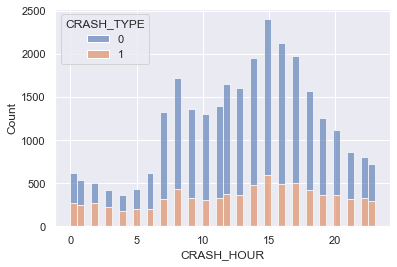

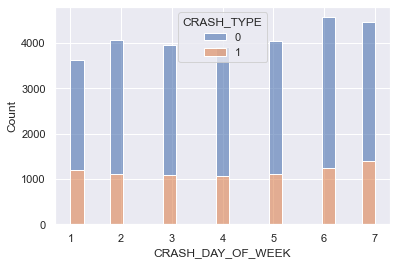

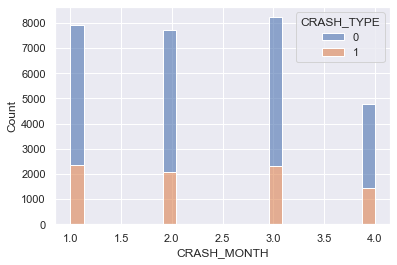

In [45]:
# plot numerical varaibles histograms
sns.set(style='darkgrid')
for num in numerical:
  sns.histplot(crash22, x = num, hue = "CRASH_TYPE", alpha = 0.6,multiple="stack")
  plt.show()

<Figure size 1152x720 with 0 Axes>

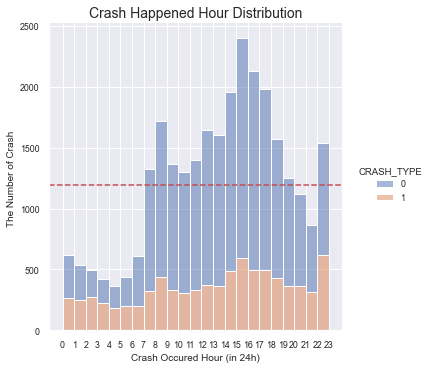

In [46]:
# crash hour specific histogram
sns.set(style='darkgrid',font_scale=0.8)
plt.figure(figsize = (16, 10))

sns.displot(crash22, x = "CRASH_HOUR", hue = "CRASH_TYPE", kind='hist',
            multiple="stack",alpha = 0.5, 
            bins= 24,binwidth=1)

# add average line
plt.axhline(crash22["CRASH_HOUR"].value_counts().mean(), color='r', linestyle='dashed', linewidth=1.5)

# add title and label
plt.xticks(np.arange(min(crash22.CRASH_HOUR), max(crash22.CRASH_HOUR)+1,1))
plt.title('Crash Happened Hour Distribution', fontsize=14)
plt.xlabel("Crash Occured Hour (in 24h)",fontsize=10)
plt.ylabel("The Number of Crash ",fontsize=10)

plt.show()



## Modeling

### Split dataset in features and target variable

In [47]:
crash22_new = crash22.drop(columns = ['CRASH_DATE'])

X = crash22_new.loc[:, crash22_new.columns != 'CRASH_TYPE']
y = crash22_new['CRASH_TYPE']

In [48]:
crash22_new['CRASH_TYPE'].dtypes

dtype('int64')

### Encoding Categorical Variables

In [49]:
X = pd.get_dummies(X)

In [50]:
X.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_NO CONTROLS,TRAFFIC_CONTROL_DEVICE_NO PASSING,...,SEC_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,SEC_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,SEC_CONTRIBUTORY_CAUSE_NOT APPLICABLE,SEC_CONTRIBUTORY_CAUSE_Other,SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
0,30,2,0,8,5,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,30,3,1,12,4,3,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,15,2,0,11,4,2,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,30,3,1,14,5,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,30,2,0,19,5,3,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [51]:
X.shape

(28653, 127)

In [52]:
y.shape

(28653,)

In [53]:
#Make all variables integer
X = X.astype(int)
y = y.astype(int)

### Correlation Matrix 

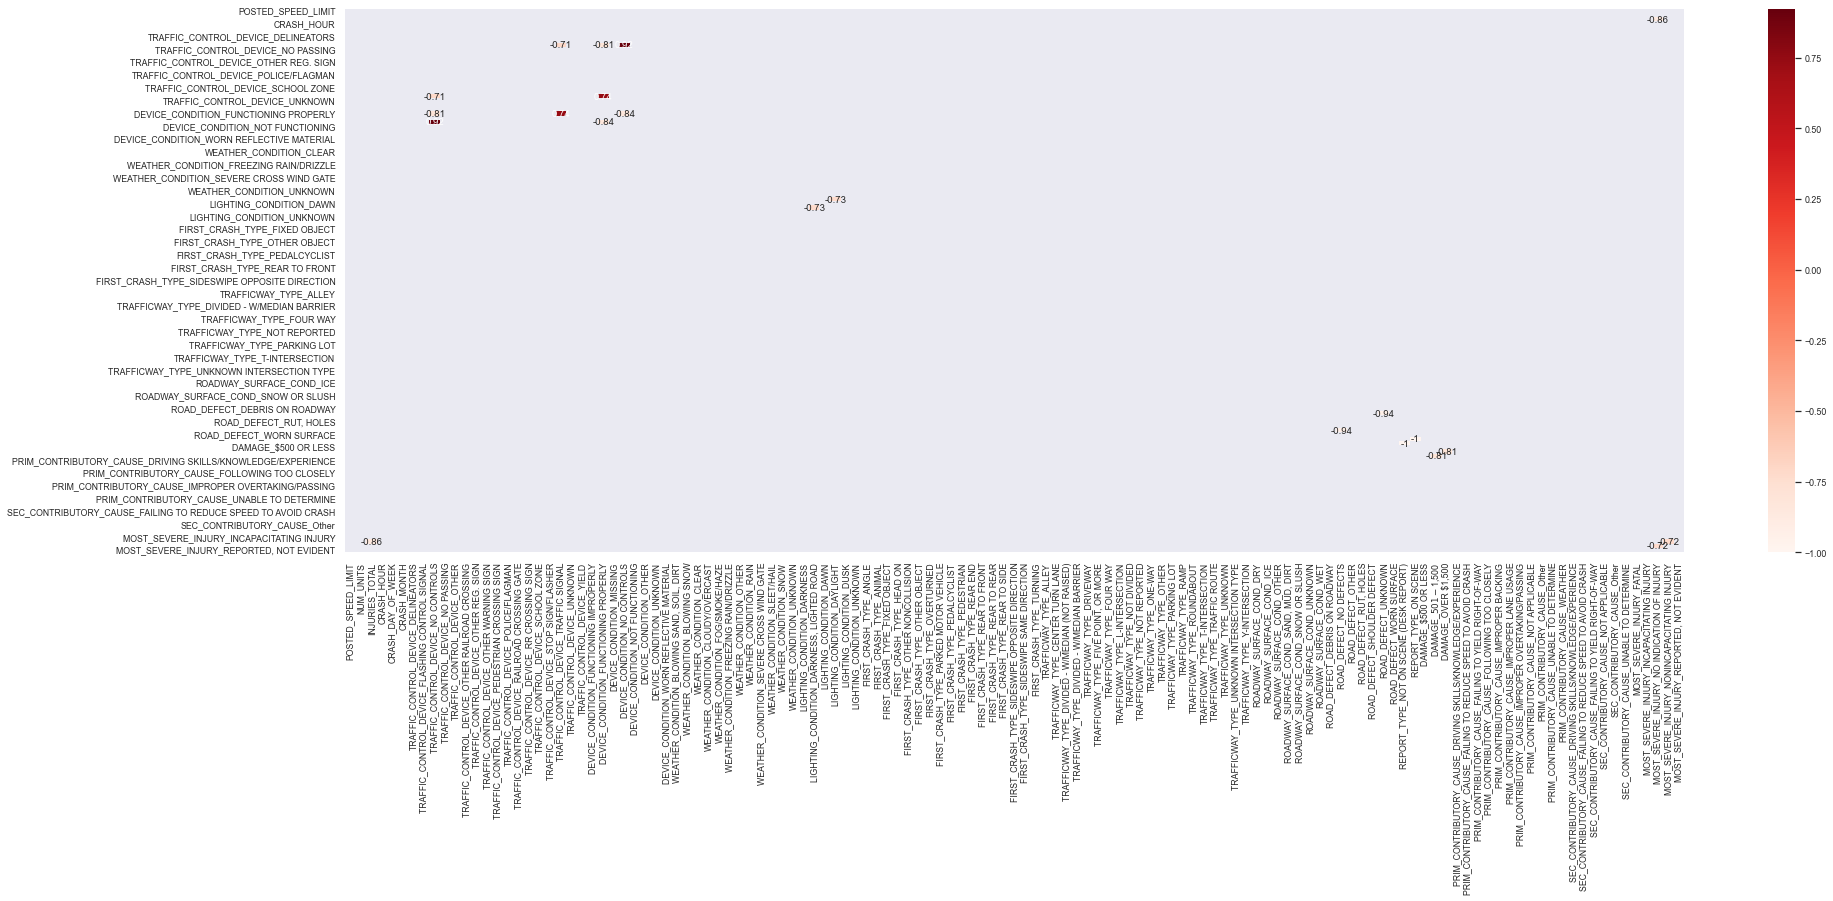

In [54]:
#Plot the correlation matrix for all independent variables
xCorr = X.corr()
filteredDf = xCorr[((xCorr >= .7) | (xCorr <= -.7)) & (xCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [55]:
#Show most highly correlated variables
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(X, .7)

REPORT_TYPE_ON SCENE                        REPORT_TYPE_NOT ON SCENE (DESK REPORT)        -1.000000
ROAD_DEFECT_UNKNOWN                         ROAD_DEFECT_NO DEFECTS                        -0.944185
INJURIES_TOTAL                              MOST_SEVERE_INJURY_NO INDICATION OF INJURY    -0.857666
DEVICE_CONDITION_FUNCTIONING PROPERLY       DEVICE_CONDITION_NO CONTROLS                  -0.839448
DAMAGE_$501 - $1,500                        DAMAGE_OVER $1,500                            -0.807635
DEVICE_CONDITION_FUNCTIONING PROPERLY       TRAFFIC_CONTROL_DEVICE_NO CONTROLS            -0.806895
LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD   LIGHTING_CONDITION_DAYLIGHT                   -0.728432
MOST_SEVERE_INJURY_NO INDICATION OF INJURY  MOST_SEVERE_INJURY_NONINCAPACITATING INJURY   -0.723675
TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL       TRAFFIC_CONTROL_DEVICE_NO CONTROLS            -0.710867
                                            DEVICE_CONDITION_FUNCTIONING PROPERLY          0.736137


#### VIF Score

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

high_corr = X[['REPORT_TYPE_ON SCENE', 'REPORT_TYPE_NOT ON SCENE (DESK REPORT)', 
              'ROAD_DEFECT_UNKNOWN', 'ROAD_DEFECT_NO DEFECTS','INJURIES_TOTAL',
              'MOST_SEVERE_INJURY_NO INDICATION OF INJURY', 'DEVICE_CONDITION_FUNCTIONING PROPERLY',
              'DEVICE_CONDITION_NO CONTROLS', 'DAMAGE_OVER $1,500', 'DAMAGE_$501 - $1,500', 'TRAFFIC_CONTROL_DEVICE_NO CONTROLS',
              'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD', 'LIGHTING_CONDITION_DAYLIGHT',
              'MOST_SEVERE_INJURY_NONINCAPACITATING INJURY', 'TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL', 'POSTED_SPEED_LIMIT']]
vif = pd.DataFrame()
vif['feature'] = high_corr.columns

vif['VIF'] = [variance_inflation_factor(high_corr.values,i) for i in range(len(high_corr.columns))]

print(vif)

                                        feature        VIF
0                          REPORT_TYPE_ON SCENE  71.154025
1        REPORT_TYPE_NOT ON SCENE (DESK REPORT)  76.264787
2                           ROAD_DEFECT_UNKNOWN   9.336687
3                        ROAD_DEFECT_NO DEFECTS   9.259547
4                                INJURIES_TOTAL   3.801230
5    MOST_SEVERE_INJURY_NO INDICATION OF INJURY   4.930353
6         DEVICE_CONDITION_FUNCTIONING PROPERLY   4.515433
7                  DEVICE_CONDITION_NO CONTROLS   8.660927
8                            DAMAGE_OVER $1,500   2.909204
9                          DAMAGE_$501 - $1,500   2.930201
10           TRAFFIC_CONTROL_DEVICE_NO CONTROLS   7.260381
11    LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD   2.255270
12                  LIGHTING_CONDITION_DAYLIGHT   2.247147
13  MOST_SEVERE_INJURY_NONINCAPACITATING INJURY   2.102278
14        TRAFFIC_CONTROL_DEVICE_TRAFFIC SIGNAL   2.404926
15                           POSTED_SPEED_LIMIT   1.0519

In [57]:
#Dropping columns with high multicollinearity 
X = X.drop(columns=['REPORT_TYPE_ON SCENE', 'REPORT_TYPE_NOT ON SCENE (DESK REPORT)',
                    'ROAD_DEFECT_UNKNOWN', 'ROAD_DEFECT_NO DEFECTS', 'DEVICE_CONDITION_NO CONTROLS',
                   'TRAFFIC_CONTROL_DEVICE_NO CONTROLS'],axis=1)
X.head()

,POSTED_SPEED_LIMIT,NUM_UNITS,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER,...,SEC_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,SEC_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,SEC_CONTRIBUTORY_CAUSE_NOT APPLICABLE,SEC_CONTRIBUTORY_CAUSE_Other,SEC_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
0,30,2,0,8,5,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,30,3,1,12,4,3,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,15,2,0,11,4,2,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,30,3,1,14,5,3,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,30,2,0,19,5,3,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Split Data into Training and Testing (70/30)

In [58]:
# dataset split to train and test dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [59]:
# check splited datasets
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (20057, 121)
Training Labels Shape: (20057,)
Testing Features Shape: (8596, 121)
Testing Labels Shape: (8596,)


In [60]:
display(X_train.dtypes)

POSTED_SPEED_LIMIT                             int64
NUM_UNITS                                      int64
INJURIES_TOTAL                                 int64
CRASH_HOUR                                     int64
CRASH_DAY_OF_WEEK                              int64
                                               ...  
MOST_SEVERE_INJURY_FATAL                       int64
MOST_SEVERE_INJURY_INCAPACITATING INJURY       int64
MOST_SEVERE_INJURY_NO INDICATION OF INJURY     int64
MOST_SEVERE_INJURY_NONINCAPACITATING INJURY    int64
MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT       int64
Length: 121, dtype: object

In [61]:
# Create a function to plot roc curve
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

def roc_curve_plot(y_test,y_pred_proba):

  plt.figure(figsize = (8, 6))
# Calculate fpr, tpr, and thresholds for test set
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the training FPR and TPR
  plt.plot(fpr, tpr, label = "ROC")
  plt.text(0.65, 0.3, "AUC="+str(round(auc,2)), ha='center',fontsize=14,weight='bold')
  
# Plot positive sloped 1:1 line for reference
  plt.plot([0,1],[0,1])
  plt.xlim([-0.02, 1.0])
  plt.ylim([0.0, 1.05])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)

In [62]:
#Create a function make_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


### Model 1: Logistic Regression 

In [63]:
#Building the model and fitting the data
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1', solver='liblinear') 
model= LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

#### Confusion Matrix using Heatmap

[[5904  231]
 [ 898 1563]]


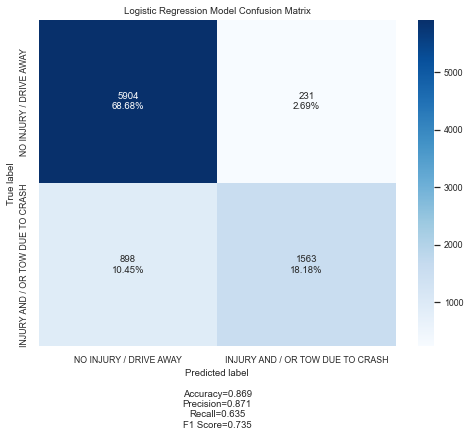

In [64]:
#Generate a confusion_matrix
LR_matrix = confusion_matrix(y_test, predictions)

print(LR_matrix)

# plot matrix chart

categories = ['NO INJURY / DRIVE AWAY','INJURY AND / OR TOW DUE TO CRASH']
make_confusion_matrix(LR_matrix, 
                      categories=categories,
                      title = "Logistic Regression Model Confusion Matrix",
                      figsize=(8,6))

plt.show()

In [65]:
#Calculate performance metrics
from sklearn.metrics import classification_report
print('Logistic Regression performance metrics: ')
print(classification_report(y_test, predictions))

Logistic Regression performance metrics: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6135
           1       0.87      0.64      0.73      2461

    accuracy                           0.87      8596
   macro avg       0.87      0.80      0.82      8596
weighted avg       0.87      0.87      0.86      8596



In [66]:
#Logistic Regression Summary
import statsmodels.api as sm

LR_Model = sm.Logit(y_train, X_train).fit()
result = LR_Model.summary()
print(result)

         Current function value: 0.308523
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             CRASH_TYPE   No. Observations:                20057
Model:                          Logit   Df Residuals:                    19944
Method:                           MLE   Df Model:                          112
Date:                Thu, 19 May 2022   Pseudo R-squ.:                  0.4848
Time:                        19:42:21   Log-Likelihood:                -6188.0
converged:                      False   LL-Null:                       -12010.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
POSTED_SPEED_LIMIT                      

/Users/ms_fatishi/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
#LR Model Summary result
pd.set_option('display.expand_frame_repr', False)

results_as_html = result.tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,z,P>|z|,[0.025,0.975]
POSTED_SPEED_LIMIT,0.0203,0.005,3.868,0.000,0.010,0.031
NUM_UNITS,1.1876,0.062,19.165,0.000,1.066,1.309
INJURIES_TOTAL,-2.7669,514.586,-0.005,0.996,-1011.337,1005.803
CRASH_HOUR,-0.0177,0.004,-4.574,0.000,-0.025,-0.010
CRASH_DAY_OF_WEEK,-0.0165,0.011,-1.443,0.149,-0.039,0.006
...,...,...,...,...,...,...
MOST_SEVERE_INJURY_FATAL,4.4204,NaN,NaN,NaN,NaN,NaN
MOST_SEVERE_INJURY_INCAPACITATING INJURY,11.0197,NaN,NaN,NaN,NaN,NaN
MOST_SEVERE_INJURY_NO INDICATION OF INJURY,-27.9154,NaN,NaN,NaN,NaN,NaN
MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,19.7043,NaN,NaN,NaN,NaN,NaN


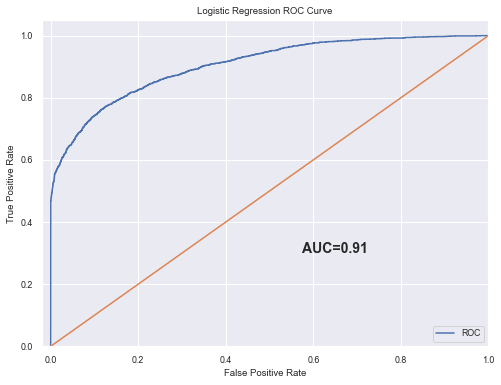

In [68]:
# plot LR ROC curve 
lr_pred_proba = model.predict_proba(X_test)[::,1]
roc_curve_plot(y_test,lr_pred_proba)
plt.title("Logistic Regression ROC Curve")

#plt.savefig('/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Fig/LR_ROC_Curve.png',bbox_inches='tight')
plt.show()

### Model 2: Random Forest

In [69]:
# import random forest model 
from sklearn.ensemble import RandomForestClassifier
from numpy import mean,std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# define the RamdomForest model
rfc = RandomForestClassifier().fit(X_train,y_train)

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



Mean Accuracy: 0.860 (0.007)


In [70]:
# predictions
rfc_predict = rfc.predict(X_test)

# evaluate the model and collect the scores
rfc_pred_proba = rfc.predict_proba(X_test)[::,1]

#calculate AUC of model
auc2 = metrics.roc_auc_score(y_test, rfc_pred_proba)

#print AUC score
print("AUC score:",auc2)
print("Accuracy:",rfc.score(X_test, y_test))

AUC score: 0.8960942785696473
Accuracy: 0.8615635179153095


In [71]:
# create classification report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6135
           1       0.84      0.64      0.72      2461

    accuracy                           0.86      8596
   macro avg       0.85      0.79      0.82      8596
weighted avg       0.86      0.86      0.86      8596





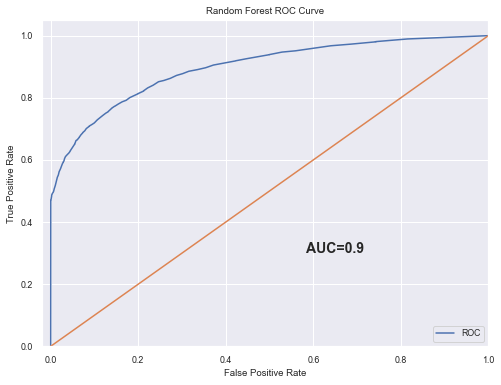

In [72]:
# plot RF ROC Curve
roc_curve_plot(y_test,rfc_pred_proba)
plt.title("Random Forest ROC Curve")
#plt.savefig('/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Fig/RF_ROC_Curve.png',bbox_inches='tight')
plt.show()

[[5842  293]
 [ 897 1564]]


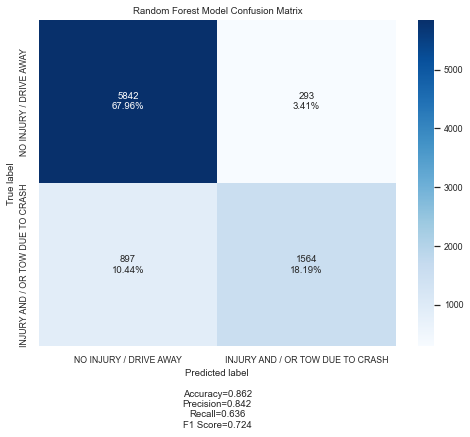

In [73]:
# make_confusion_matrix
rfc_matrix = confusion_matrix(y_test, rfc_predict)
print(rfc_matrix)

# plot matrix chart

categories = ['NO INJURY / DRIVE AWAY','INJURY AND / OR TOW DUE TO CRASH']
make_confusion_matrix(rfc_matrix, 
                      categories=categories,
                      title = "Random Forest Model Confusion Matrix",
                      figsize=(8,6))


#plt.savefig('/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Fig/RF_Confusion_Matrix.png',bbox_inches='tight')
plt.show()

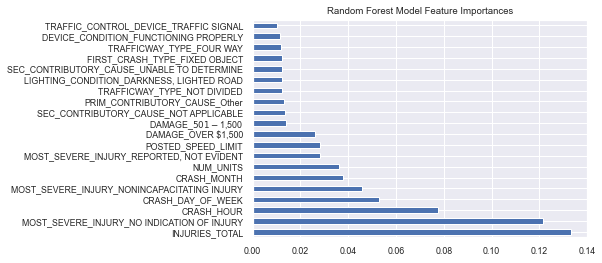

In [74]:
# create feature importance barchart
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.title("Random Forest Model Feature Importances")
#plt.savefig('/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Fig/RF_Feature_Imp.png',bbox_inches='tight')
plt.show()

### Model 3: XGBoost

In [75]:
# build XGboost model 
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1, n_estimators=100 , random_state=42) 
xgb.fit(X_train, y_train)

# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(xgb, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.866 (0.008)


In [76]:
# XGBoost prediction and classification report
xgb_pred = xgb.predict(X_test)

# evaluate the model and collect the scores
xgb_pred_proba = xgb.predict_proba(X_test)[::,1]

print("=== Classification Report ===")
print(classification_report(y_test,xgb_pred ))  
print('\n')


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6135
           1       0.86      0.64      0.73      2461

    accuracy                           0.87      8596
   macro avg       0.86      0.80      0.82      8596
weighted avg       0.87      0.87      0.86      8596





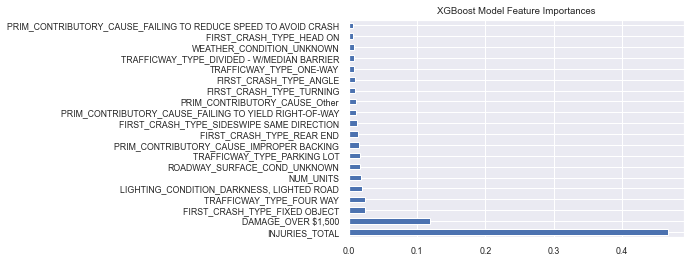

In [77]:
# create feature importance barchart
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

plt.title("XGBoost Model Feature Importances")
#plt.savefig('/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Fig/XGboost_Feature_Imp.png',bbox_inches='tight')
plt.show()

In [78]:
feat_importances.sort_values()

MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT     0.000000
TRAFFICWAY_TYPE_Y-INTERSECTION               0.000000
TRAFFICWAY_TYPE_TRAFFIC ROUTE                0.000000
TRAFFICWAY_TYPE_ROUNDABOUT                   0.000000
DEVICE_CONDITION_MISSING                     0.000000
                                               ...   
LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD    0.018854
TRAFFICWAY_TYPE_FOUR WAY                     0.023779
FIRST_CRASH_TYPE_FIXED OBJECT                0.024279
DAMAGE_OVER $1,500                           0.118942
INJURIES_TOTAL                               0.466894
Length: 121, dtype: float32

[[5882  253]
 [ 894 1567]]


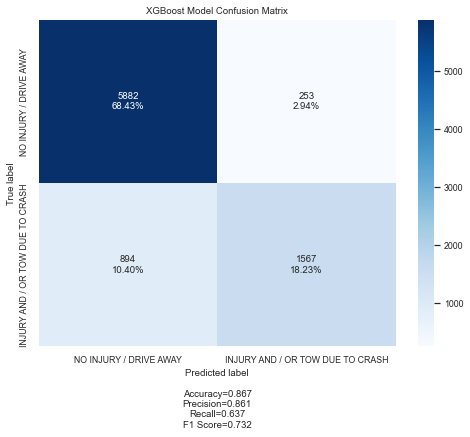

In [79]:
# XGBoost make_confusion_matrix
xgb_matrix = confusion_matrix(y_test, xgb_pred )
print(xgb_matrix)

# plot matrix chart

categories = ['NO INJURY / DRIVE AWAY','INJURY AND / OR TOW DUE TO CRASH']
make_confusion_matrix(xgb_matrix, 
                      categories=categories,
                      title = "XGBoost Model Confusion Matrix",
                      figsize=(8,6))

#plt.savefig('/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Fig/XGboost_Confusion_Matrix_.png',bbox_inches='tight')
plt.show()

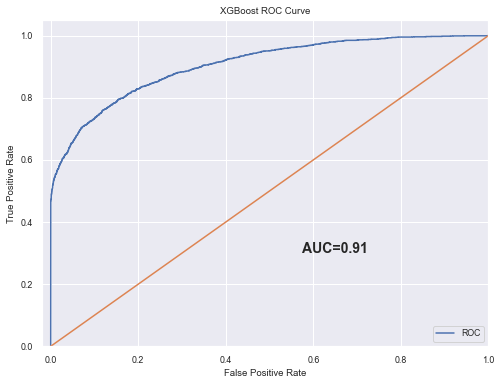

In [80]:
# plot RF ROC Curve
roc_curve_plot(y_test,xgb_pred_proba)
plt.title("XGBoost ROC Curve")
#plt.savefig('/content/drive/MyDrive/ALY6140/ALY6140 - Group Work/Fig/XGBoost_ROC_Curve.png',bbox_inches='tight')
plt.show()